<a href="https://colab.research.google.com/github/TSHABBA01/JavaPrograms/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


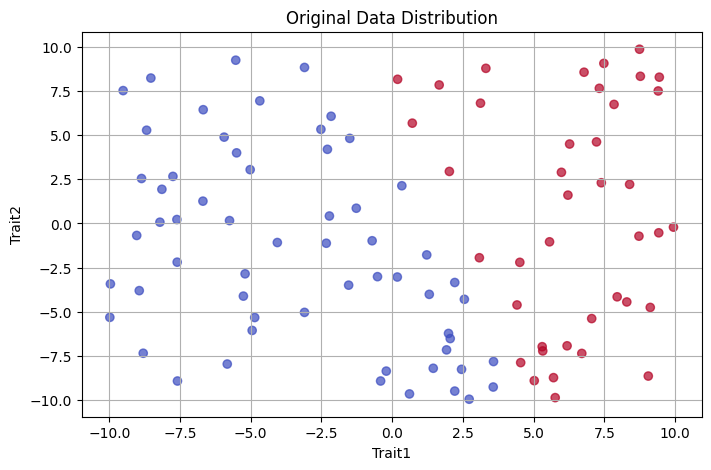


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[11  0]
 [ 0  9]]
Accuracy: 1.0
Number of Iterations: 8
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


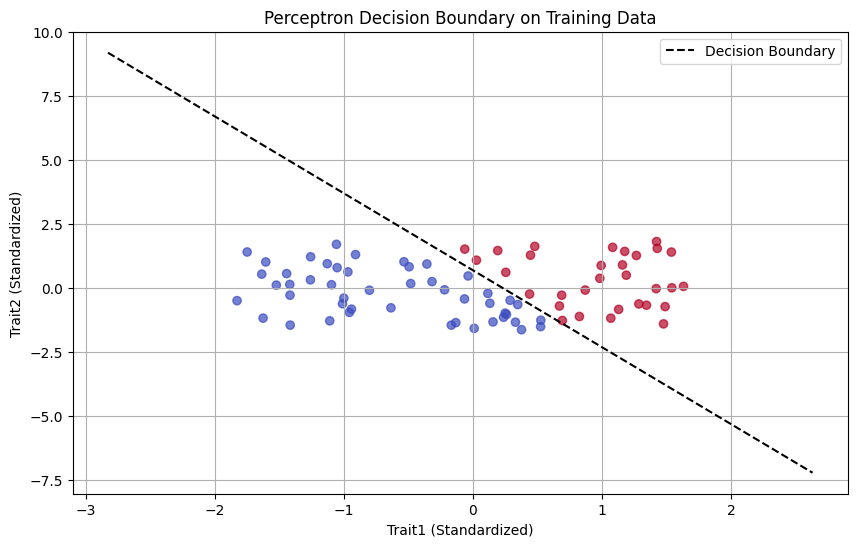

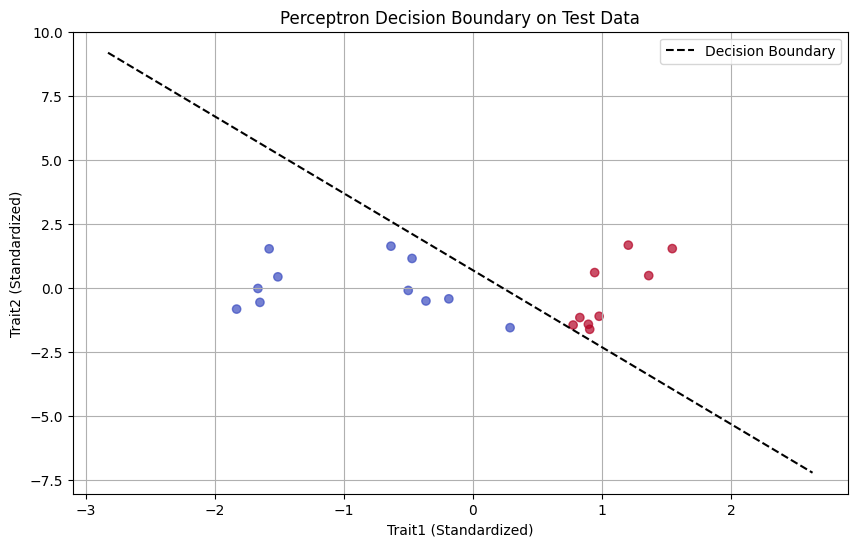

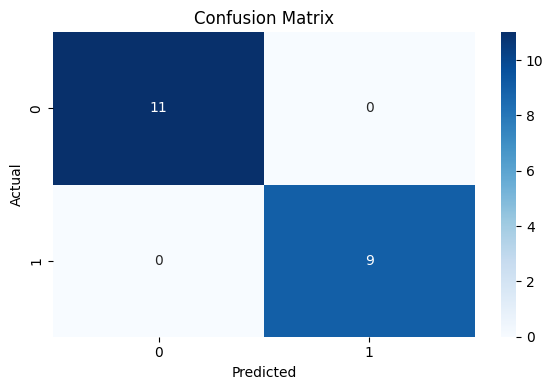

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_excel(r"/content/Percept1.xlsx")  # Ensure the file is in the working directory or provide the full path

# Extract features and labels
X = df[['Trait1', 'Trait2']]
y = df['Output']

# Show original (non-scaled) data for visualization
plt.figure(figsize=(8, 5))
plt.scatter(X['Trait1'], X['Trait2'], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("Trait1")
plt.ylabel("Trait2")
plt.title("Original Data Distribution")
plt.grid(True)
plt.show()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

# Standardize features to improve Perceptron convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Perceptron model
model = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Number of Iterations:", model.n_iter_)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Save classification report to file
with open("classification_report.txt", "w") as f:
    f.write(report)

# Extract weights and bias
w = model.coef_[0]
b = model.intercept_[0]

# Plot training data and decision boundary
x_values = np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100)
y_values = -(w[0] / w[1]) * x_values - (b / w[1])

plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.xlabel("Trait1 (Standardized)")
plt.ylabel("Trait2 (Standardized)")
plt.title("Perceptron Decision Boundary on Training Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot test data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.xlabel("Trait1 (Standardized)")
plt.ylabel("Trait2 (Standardized)")
plt.title("Perceptron Decision Boundary on Test Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

